___
# Atividade: Soma de variáveis aleatórias 
___

## Aula 17

**Preparo Prévio:**
1. Seção 5.1 – págs 137 a 140: aborda como fazer uma distribuição de probabilidade conjunta entre duas variáveis aleatórias X e Y e define função de probabilidade conjunta.
2. Seção 5.2 – págs 146 a 149; págs 156 e 157 (Exemplo 5.12) e págs 158 a 162 (Exemplo 5.13): aborda propriedades de esperança e variância em soma de variáveis aleatórias (X+Y). 

**Hoje:**
1. Descrever as propriedades de distribuição conjunta entre duas variáveis aleatórias discretas.
2. Compreender correlação entre variáveis aleatórias.
3. Descrever as propriedades de esperança e variância para soma de variáveis aleatórias (discretas e contínuas).


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 7.3 (págs 234 a 240).
___

In [6]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


___
## <font color='blue'>Exercício 1 - Exemplo 3 da Aula 17 </font>

Num determinado momento em um certo país, a taxa de juros ($X$) pode variar 0,25 pontos percentuais (pp), para cima ou para baixo, ou manter-se constante. 
Já a taxa de câmbio ($Y$) pode variar para mais ou para menos em 1 pp, ou manter-se constante.
A tabela seguinte reflete as distribuições marginais e conjunta dessas duas taxas representadas, aqui, por $X$ e $Y$. 

![Tabela](XeY.png)

Um investidor aplica a mesma quantia num fundo que acompanha a variação da taxa de juros ($X$) e num fundo que acompanha a variação cambial ($Y$). Ao final do dia ele resgatará seu investimento.
1. Encontre a $E(X)$, $Var(X)$, $E(Y)$, $Var(Y)$, $Cov(X,Y)$ e $Corr(X,Y)$.
2. Construa a distribuição de probabilidades do ganho (em variação %) desse investidor, ou seja, encontre todos os valores de $G=0.5*X+0.5*Y$, sendo $G$ o ganho do investidor aplicando metade do dinheiro em $X$ e metade do dinheiro em $Y$. 
3. Calcule esperança e variância de $G$ utilizando a distribuição de probabilidade, ou seja, $E(G)$ e $Var(G)$.
4. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.


In [7]:
#Valores da tabela
y=[-1,0,1] #colunas
x=[-0.25,0,0.25] #linhas
probXY=[[[] for i in range(3)] for i in range(3)]
pxy=[0.05,0.07,0.26,0.075,0.21,0.12,0.125,0.07,0.02]
k=0
for i in range(3):
    for j in range(3):
        probXY[i][j]=pxy[k]
        k+=1
print(probXY)

[[0.05, 0.07, 0.26], [0.075, 0.21, 0.12], [0.125, 0.07, 0.02]]


In [8]:
#item 1 
#Distribuição de X
probX=[0,0,0]
for i in range(3):
    for j in range(3):
        probX[i]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de X=",x[i]," é igual a ", probX[i])

espX=0
varX=0
for i in range(3):
    espX+=x[i]*probX[i]
for i in range(3):
    varX+=(x[i]-espX)**2*probX[i]
print("Esperança de X=",espX)
print("Variância de X=",varX)


Probabilidade de X= -0.25  é igual a  0.38
Probabilidade de X= 0  é igual a  0.40499999999999997
Probabilidade de X= 0.25  é igual a  0.215
Esperança de X= -0.04125
Variância de X= 0.0354859375


In [9]:
#item 1 
#Distribuição de Y
probY=[0,0,0]
for i in range(3):
    for j in range(3):
        probY[j]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de Y=",y[i]," é igual a ", probY[i])

espY=0
varY=0
for i in range(3):
    espY+=y[i]*probY[i]
for i in range(3):
    varY+=(y[i]-espY)**2*probY[i]
print("Esperança de Y=",espY)
print("Variância de Y=",varY)


Probabilidade de Y= -1  é igual a  0.25
Probabilidade de Y= 0  é igual a  0.35000000000000003
Probabilidade de Y= 1  é igual a  0.4
Esperança de Y= 0.15000000000000002
Variância de Y= 0.6275


In [10]:
#item 1
#Covariância e Correlação
cov=0
for i in range(3):
    for j in range(3):
        cov+=(x[i]-espX)*(y[j]-espY)*probXY[i][j]

corr=cov/(varX*varY)**(0.5)
print("Covariância entre X e Y=", cov)
print("Correlação entre X e Y=", corr)


Covariância entre X e Y= -0.07256249999999999
Correlação entre X e Y= -0.4862697238590869


In [11]:
#item 2
#Distribuição do G=0.5*X +0.5*Y
g=[]
probG=[]
for i in range(3):
    for j in range(3):
        a = 0.5*x[i]+0.5*y[j]
        if a in g:
            probG[g.index(a)] += probX[i][j]
        else:
            g.append(a)         
            probG.append(probXY[i][j])

for i in range(len(g)):
    print("Probabilidade de G=",g[i]," é igual a ", probG[i])


Probabilidade de G= -0.625  é igual a  0.05
Probabilidade de G= -0.125  é igual a  0.07
Probabilidade de G= 0.375  é igual a  0.26
Probabilidade de G= -0.5  é igual a  0.075
Probabilidade de G= 0.0  é igual a  0.21
Probabilidade de G= 0.5  é igual a  0.12
Probabilidade de G= -0.375  é igual a  0.125
Probabilidade de G= 0.125  é igual a  0.07
Probabilidade de G= 0.625  é igual a  0.02


In [12]:
#item 3
#Esperança e variância de G
espG=0
varG=0
for i in range(len(g)):
    a=g[i]*probG[i]
    print(a)
    espG+=a
for i in range(len(g)):
    varG+=(g[i]-espG)**2*probG[i]

print("Esperança e variância de G usando distribuição de probabilidade de G:")
print("Esperança de G=",espG)
print("Variância de G=",varG)

-0.03125
-0.00875
0.0975
-0.0375
0.0
0.06
-0.046875
0.00875
0.0125
Esperança e variância de G usando distribuição de probabilidade de G:
Esperança de G= 0.05437500000000001
Variância de G= 0.12946523437500002


In [13]:
#item 4
#Esperança e variância de G usando propriedades de soma de variáveis aleatórias

#G=0.5X + 0.5Y
#G=0.5*(X+Y)

espGp = 0.5*(espX+espY)
varGp = 0.5**2*(varX+varY+2*cov)

print("Esperança e variância de G usando propriedades:")
print("Esperança de G=",espGp)
print("Variância de G=",varGp)


Esperança e variância de G usando propriedades:
Esperança de G= 0.05437500000000001
Variância de G= 0.129465234375


___
## <font color='blue'>Exercício 2 - Soma de normais correlacionadas</font>

Um pacote com mil peças de resistor de carbono 1/8w tem o preço distribuído como uma normal com média 21 reais e desvio padrão de 2 reais, ou seja, $X$~$N(21;4)$.

Já jumpers/fios macho-fêmea com 40 unidades de 20 cm tem o preço distribuído como uma normal com média 18,90 reais e desvio padrão de 1,50 reais, ou seja, $Y$~$N(18,90;2,25)$.

Assuma que a correlação entre esses dois preços seja de 0,85.

1. Simule $n=100$, $n=1.000$ e $n=10.000$ de cada variáveis aleatória respeitando a correlação entre elas. Para tanto, consulte o comando `np.random.multivariate_normal(mean, cov, n)`. 
2. Se você vai passear na Santa Efigênia para comprar um pacote de cada um, calcule a esperança e a variância do gasto $G=X+Y$ com a compra de uma pacotinho de resistores e um jumper nas especificações acima descritos. 
3. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.
4. Construa a distribuição do gasto e verifique se o gasto se assemelha a distribuição normal.
5. Repita assumindo correlação igual a zero entre X e Y.


In [14]:
#Informações do enunciado
muX = 21
varX = 4
muY = 18.90
varY = 2.25
corXY = 0.95
covXY = corXY*(varX*varY)**(0.5)
mean = [muX, muY]
cov = [[varX, covXY], [covXY, varY]]  # diagonal covariance

In [15]:
#item 1 - Calculando as matrizes de covariâncias
n1=100
x1, y1 = np.random.multivariate_normal(mean, cov, n1).T

print("Matriz de covariâncias para n=100:")
print(np.cov(x1,y1))

n2=1000
x2, y2 = np.random.multivariate_normal(mean, cov, n2).T

print("Matriz de covariâncias para n=1000:")
print(np.cov(x2,y2))

n3=10000
x3, y3 = np.random.multivariate_normal(mean, cov, n3).T

print("Matriz de covariâncias para n=10000:")
print(np.cov(x3,y3))

Matriz de covariâncias para n=100:
[[ 4.8304891   3.82963793]
 [ 3.82963793  3.26508111]]
Matriz de covariâncias para n=1000:
[[ 3.86007287  2.82878618]
 [ 2.82878618  2.28903838]]
Matriz de covariâncias para n=10000:
[[ 4.07449573  2.88870919]
 [ 2.88870919  2.26790122]]


In [16]:
#item 2 - Calculando as médias e variâncias do gasto
G1=0
varG=0
G=[]

G2=0
varG2=0
G_2=[]

G3=0
varG3=0
G_3=[]

for i in range(len(x1)):
    G1+=(x1[i]+y1[i])

mediaG = G1/100

for i in range(len(x1)):
    G.append(x1[i]+y1[i])
    varG += ((G[i]-mediaG)**2)/100
    
for i in range(len(x2)):
    G2+=(x2[i]+y2[i])

mediaG2 = G2/1000

for i in range(len(x2)):
    G_2.append(x2[i]+y2[i])
    varG2 += ((G_2[i]-mediaG2)**2)/1000

for i in range(len(x3)):
    G3+=(x3[i]+y3[i])

mediaG3 = G3/10000

for i in range(len(x3)):
    G_3.append(x3[i]+y3[i])
    varG3 += ((G_3[i]-mediaG3)**2)/10000
    
print("Média para n=100: ", mediaG)
print("Variância para n=100: ", varG)
print("Média para n=1000: ", mediaG2)
print("Variância para n=1000: ", varG2)
print("Média para n=10000: ", mediaG3)
print("Variância para n=10000: ", varG3)


Média para n=100:  39.8226773343
Variância para n=100:  15.5972976164
Média para n=1000:  40.0547956053
Variância para n=1000:  11.7948769345
Média para n=10000:  39.9239203249
Variância para n=10000:  12.1186033385


In [17]:
#item 3 - Calculando a média e a variância pela propriedade
mediaXY = (muX+muY)
variXY = (varX+varY+2*(covXY))

print("Média: ", mediaXY)
print("Variância: ", variXY)



Média:  39.9
Variância:  11.95


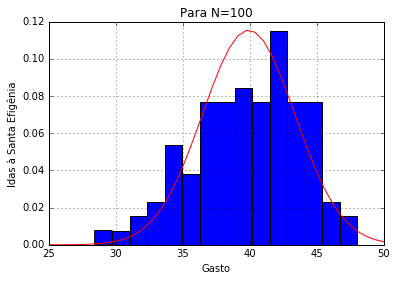

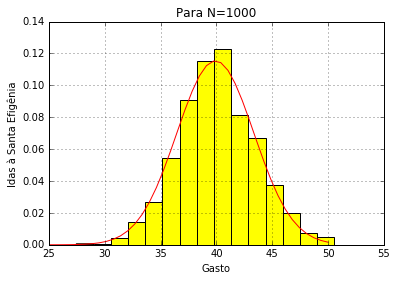

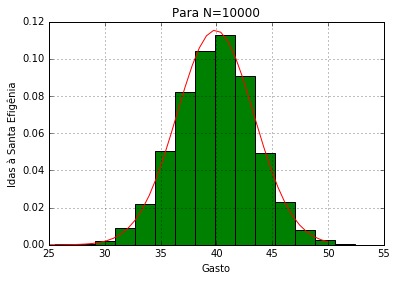

In [18]:
#item 4 - Plotando os gráficos
t = np.linspace(25,50,40)
plt.hist(G,bins=15, normed = 1)
plt.grid(True)
plt.title("Para N=100")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=mediaXY,scale=(variXY**(1/2))), color = "red")
plt.show()

plt.hist(G_2,bins=15, normed = 1, color="yellow")
plt.grid(True)
plt.title("Para N=1000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=mediaXY,scale=(variXY**(1/2))), color = "red")
plt.show()

plt.hist(G_3,bins=15, normed = 1, color="green")
plt.grid(True)
plt.title("Para N=10000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=mediaXY,scale=(variXY**(1/2))), color = "red")
plt.show()

### Quando a correlação é 0:

In [19]:
corXY2 = 0
covXY2 = corXY2*(varX*varY)**(0.5)
cov2 = [[varX, covXY2], [covXY2, varY]]


In [20]:
#item 1 - Calculando as matrizes de covariâncias
n4=100
x4, y4 = np.random.multivariate_normal(mean, cov2, n4).T

print("Matriz de covariâncias para n=100:")
print(np.cov(x4,y4))

n5=1000
x5, y5 = np.random.multivariate_normal(mean, cov2, n5).T

print("Matriz de covariâncias para n=1000:")
print(np.cov(x5,y5))

n6=10000
x6, y6 = np.random.multivariate_normal(mean, cov2, n6).T

print("Matriz de covariâncias para n=10000:")
print(np.cov(x6,y6))

Matriz de covariâncias para n=100:
[[ 4.72512128  0.4049388 ]
 [ 0.4049388   2.32498443]]
Matriz de covariâncias para n=1000:
[[ 3.83000996 -0.05320948]
 [-0.05320948  2.02849609]]
Matriz de covariâncias para n=10000:
[[ 4.07039833 -0.01661481]
 [-0.01661481  2.22811574]]


In [21]:
#item 2 - Calculando as médias e variâncias do gasto
G4=0
varG4=0
G_4=[]

G5=0
varG5=0
G_5=[]

G6=0
varG6=0
G_6=[]

for i in range(len(x4)):
    G4+=(x4[i]+y4[i])

mediaG4 = G4/100

for i in range(len(x4)):
    G_4.append(x4[i]+y4[i])
    varG4 += ((G_4[i]-mediaG4)**2)/100
    
for i in range(len(x5)):
    G5+=(x5[i]+y5[i])

mediaG5 = G5/1000

for i in range(len(x5)):
    G_5.append(x5[i]+y5[i])
    varG5 += ((G_5[i]-mediaG5)**2)/1000

for i in range(len(x6)):
    G6+=(x6[i]+y6[i])

mediaG6 = G6/10000

for i in range(len(x6)):
    G_6.append(x6[i]+y6[i])
    varG6 += ((G_6[i]-mediaG6)**2)/10000
    
print("Média para n=100: ", mediaG4)
print("Variância para n=100: ", varG4)
print("Média para n=1000: ", mediaG5)
print("Variância para n=1000: ", varG5)
print("Média para n=10000: ", mediaG6)
print("Variância para n=10000: ", varG6)

Média para n=100:  39.2743406872
Variância para n=100:  7.78138347628
Média para n=1000:  39.8820753064
Variância para n=1000:  5.74633501712
Média para n=10000:  39.8770429988
Variância para n=10000:  6.26465792297


In [23]:
#item 3 - Calculando a média e a variância pela propriedade
mediaXY2 = muX + muY
variXY2 = varX + varY
print("Média: ", mediaXY2)
print("Variância: ", variXY2)

Média:  39.9
Variância:  6.25


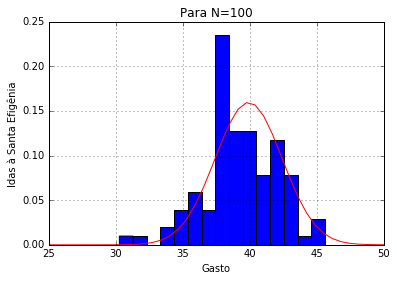

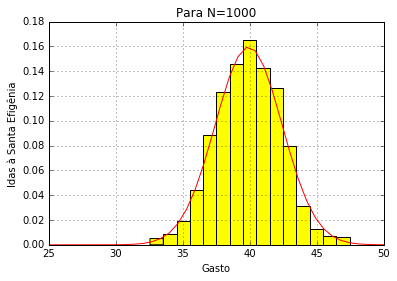

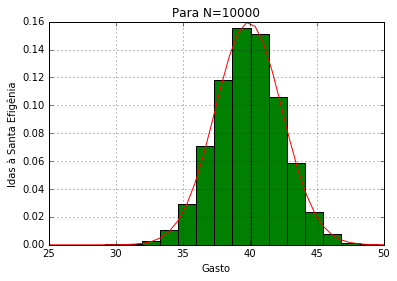

In [24]:
#item 4 - Plotando os gráficos
t = np.linspace(25,50,40)
plt.hist(G_4,bins=15, normed = 1)
plt.grid(True)
plt.title("Para N=100")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=mediaXY2,scale=(variXY2**(1/2))), color = "red")
plt.show()

plt.hist(G_5,bins=15, normed = 1, color="yellow")
plt.grid(True)
plt.title("Para N=1000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=mediaXY2,scale=(variXY2**(1/2))), color = "red")
plt.show()

plt.hist(G_6,bins=15, normed = 1, color="green")
plt.grid(True)
plt.title("Para N=10000")
plt.xlabel("Gasto")
plt.ylabel("Idas à Santa Efigênia")
plt.plot(t,stats.norm.pdf(t,loc=mediaXY2,scale=(variXY2**(1/2))), color = "red")
plt.show()